In [49]:
#数据读取板块/准备工作
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import locale
import os

default_encoding = locale.getpreferredencoding()
print(f"系统默认编码: {default_encoding}")

# 如果不是UTF-8，可以尝试设置环境变量
os.environ["PYTHONIOENCODING"] = "utf-8"

df = pd.read_excel('Dry_Bean_Dataset.xlsx')

# 检查并处理缺失值,无缺失值
# print(df.isnull().sum())
# df = df.dropna()

# 特征标准化，复用，统一标准
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_std = StandardScaler().fit_transform(X)
df_scaled = pd.DataFrame(X_std, columns=X.columns)
df_scaled['Class'] = y

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_std, y_encoded, test_size=0.3, random_state=42)

# df_scaled.to_csv('DryBeanDataset/Dry_Bean_Dataset_preprocessed.csv', index=False)

系统默认编码: utf-8



training set Evaluation outcome:
Accuracy: 0.9255
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       927
      BOMBAY       1.00      1.00      1.00       361
        CALI       0.94      0.95      0.94      1151
    DERMASON       0.92      0.92      0.92      2503
       HOROZ       0.96      0.95      0.96      1340
       SEKER       0.95      0.95      0.95      1408
        SIRA       0.86      0.87      0.86      1837

    accuracy                           0.93      9527
   macro avg       0.94      0.94      0.94      9527
weighted avg       0.93      0.93      0.93      9527



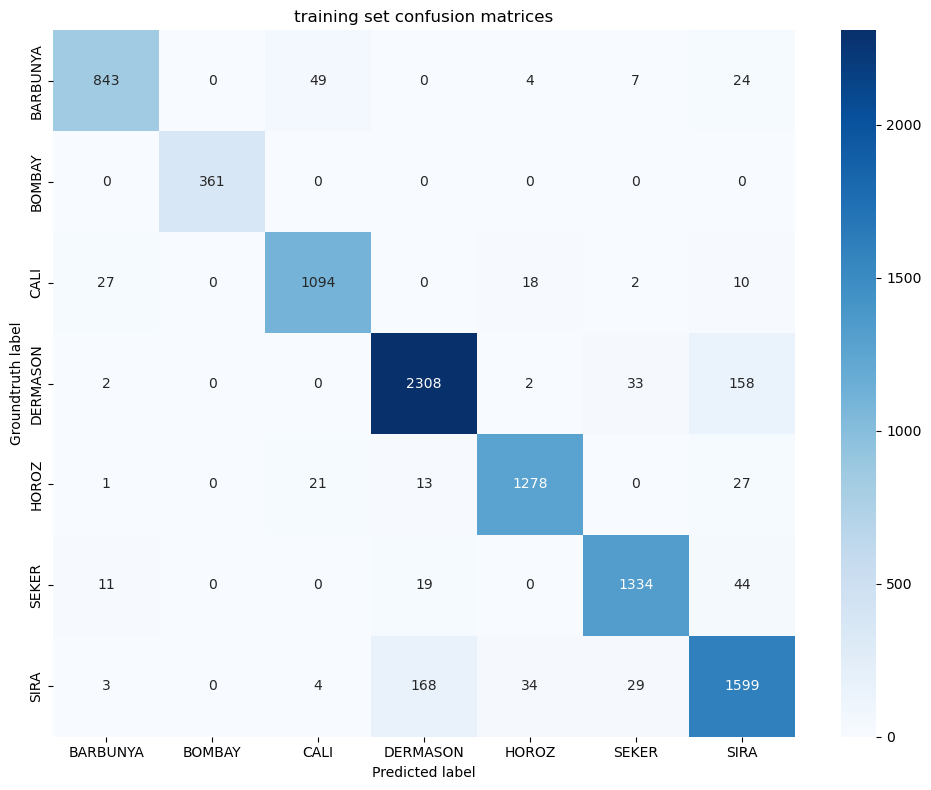


testing set Evaluation outcome:
Accuracy: 0.9229
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.91      0.91       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.94      0.93      0.93       479
    DERMASON       0.93      0.90      0.92      1043
       HOROZ       0.97      0.95      0.96       588
       SEKER       0.95      0.94      0.94       619
        SIRA       0.84      0.90      0.87       799

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



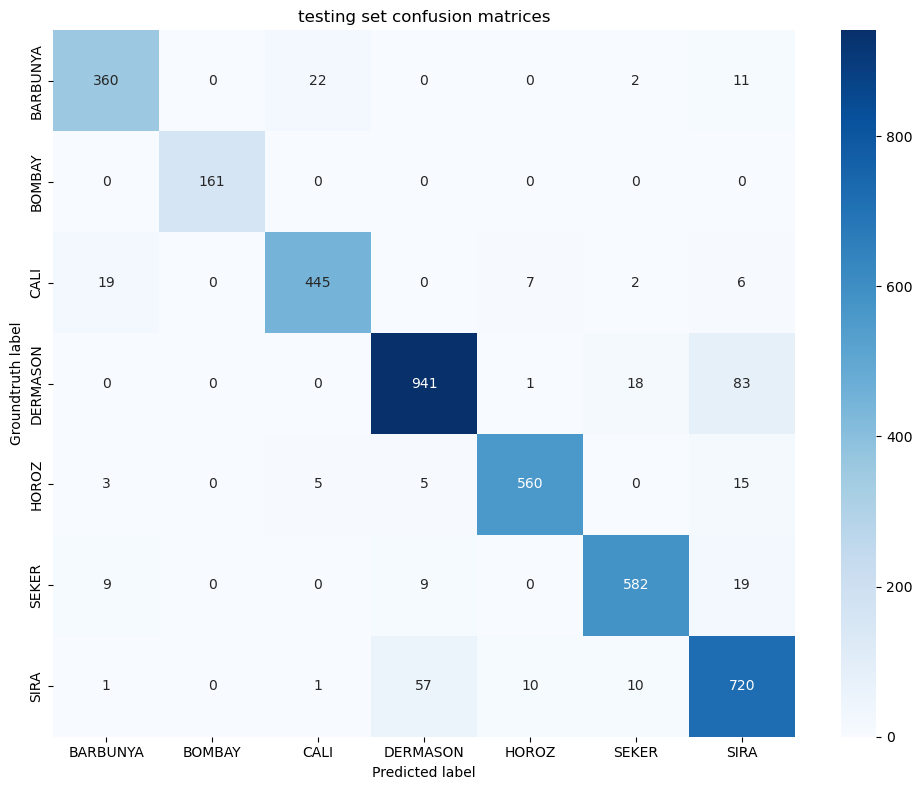


entire set Evaluation outcome:
Accuracy: 0.9247
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.91      0.93      1322
      BOMBAY       1.00      1.00      1.00       522
        CALI       0.94      0.94      0.94      1630
    DERMASON       0.92      0.92      0.92      3546
       HOROZ       0.96      0.95      0.96      1928
       SEKER       0.95      0.95      0.95      2027
        SIRA       0.85      0.88      0.87      2636

    accuracy                           0.92     13611
   macro avg       0.94      0.94      0.94     13611
weighted avg       0.93      0.92      0.92     13611



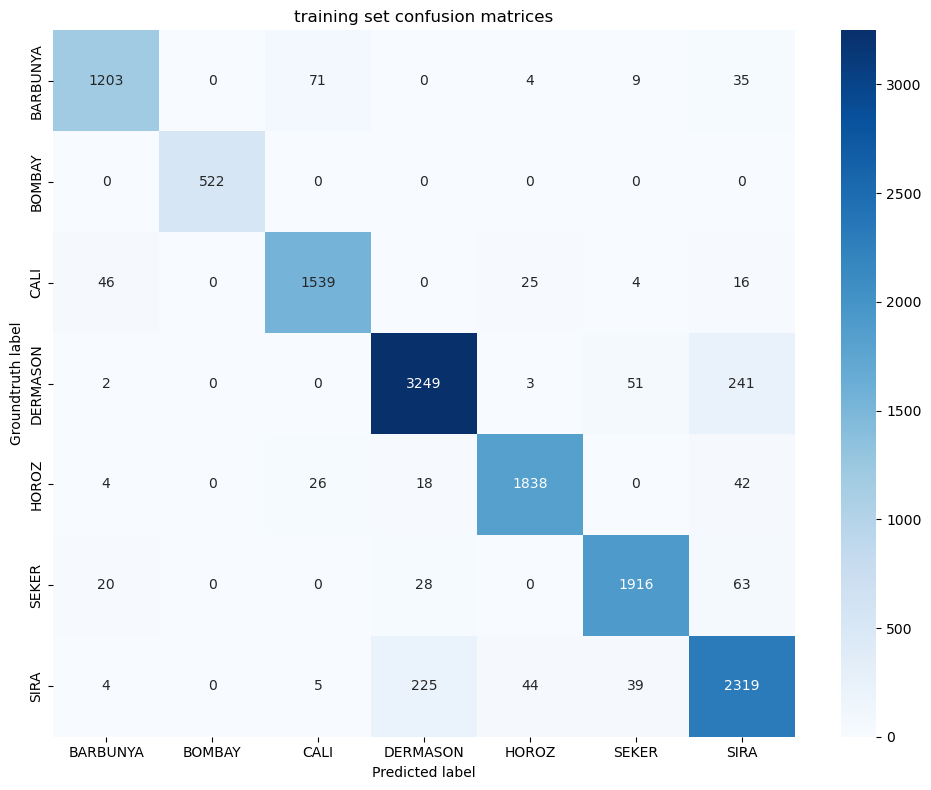

In [ ]:
#模型运行主体(LR)

# 评估函数，可复用
def evaluate_dataset(X, y, dataset_name, model, encoder):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    
    print(f"\n{dataset_name}Evaluation outcome:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y, y_pred, target_names=encoder.classes_))
    return accuracy

    # 混淆矩阵，可复用
def printmatrix(X, y, dataset_name, model, encoder):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=encoder.classes_,
                yticklabels=encoder.classes_)
    plt.xlabel('Predicted label')
    plt.ylabel('Groundtruth label')
    plt.title(f'{dataset_name}confusion matrices')
    plt.tight_layout()
    plt.show()
    return

def report(model):
    evaluate_dataset(X_train, y_train, "training set ", model, encoder)
    printmatrix(X_train, y_train, "training set ", model, encoder)

    evaluate_dataset(X_test, y_test, "testing set ", model, encoder)
    printmatrix(X_test, y_test, "testing set ", model, encoder)

    evaluate_dataset(X_std, y_encoded, "entire set ", model, encoder)
    printmatrix(X_std, y_encoded, "training set ", model, encoder)


LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, y_train)

report(LR)

# print("\n=== 预测结果解释 ===")
# print("\n1. 训练集与测试集对比:")
# print(f"- 训练集准确率: {train_accuracy:.4f}")
# print(f"- 测试集准确率: {test_accuracy:.4f}")
# if abs(train_accuracy - test_accuracy) < 0.05:
#     print("- 模型表现: 训练集和测试集准确率接近，模型没有明显的过拟合或欠拟合。")
# elif train_accuracy > test_accuracy:
#     print("- 模型表现: 训练集准确率高于测试集，可能存在轻微过拟合，但差距不大。")
# else:
#     print("- 模型表现: 测试集准确率高于训练集，可能是数据划分随机性导致，或模型复杂度不足。")

# print("\n2. 各类别表现分析:")
# for i, cls in enumerate(encoder.classes_):
#     precision = train_cm[i, i] / train_cm[:, i].sum() if train_cm[:, i].sum() > 0 else 0
#     recall = train_cm[i, i] / train_cm[i, :].sum() if train_cm[i, :].sum() > 0 else 0
#     #f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
#     print(f"- {cls}:")
#     print(f"  精确率: {precision:.4f} - 正确预测为{cls}的比例")
#     print(f"  召回率: {recall:.4f} - 实际为{cls}的样本中被正确预测的比例")
#     #if f1 < 0.8:
        #print(f"  → 注意: {cls}的F1分数较低({f1:.4f})，模型对该类别的区分能力有待提高。")

# print("\n3. 混淆矩阵分析:")
# print("- 主对角线的值越高，说明模型对该类别的识别能力越强。")
# print("- 非主对角线的值表示模型错误分类的情况，可重点关注错误较多的类别对。")

# print("\n4. 模型适用性:")
# print("- 逻辑回归是线性模型，适用于特征与类别之间存在线性关系的场景。")
# print("- 如果决策边界图显示类别之间存在复杂的非线性关系，可能需要考虑更复杂的模型。")

In [51]:
#尝试使用grid search  
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning

# 忽略警告
warnings.filterwarnings("ignore", category=ConvergenceWarning)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','saga']
}

def grid(model,param_grid):
  # 使用网格搜索进行超参数调优
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_train)

  # 输出最优超参数组合和对应的得分
  print("the model optimizing is ", model)
  print("最优超参数组合: ", grid_search.best_params_)
  print("最优得分: ", grid_search.best_score_)

  # 使用最优模型进行预测
  best_model = grid_search.best_estimator_
  #y_pred_best = best_model.predict(X_test)

  # 评估最优模型
  evaluate_dataset(X_train, y_train, "training set (Best Model)", best_model, encoder)
  evaluate_dataset(X_test, y_test, "testing set (Best Model)", best_model, encoder)
  evaluate_dataset(X_std, y_encoded, "entire set (Best Model)", best_model, encoder)

#model needed to be optimized
LRG = LogisticRegression(max_iter=1000)
grid(LRG, param_grid)

the model optimizing is  LogisticRegression(max_iter=1000)
最优超参数组合:  {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
最优得分:  0.9258943576439094

training set (Best Model)Evaluation outcome:
Accuracy: 0.9262
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       927
      BOMBAY       1.00      1.00      1.00       361
        CALI       0.93      0.95      0.94      1151
    DERMASON       0.92      0.92      0.92      2503
       HOROZ       0.96      0.95      0.95      1340
       SEKER       0.95      0.95      0.95      1408
        SIRA       0.86      0.88      0.87      1837

    accuracy                           0.93      9527
   macro avg       0.94      0.94      0.94      9527
weighted avg       0.93      0.93      0.93      9527


testing set (Best Model)Evaluation outcome:
Accuracy: 0.9226
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.91      0.92       395
      BOMBAY       1.00      

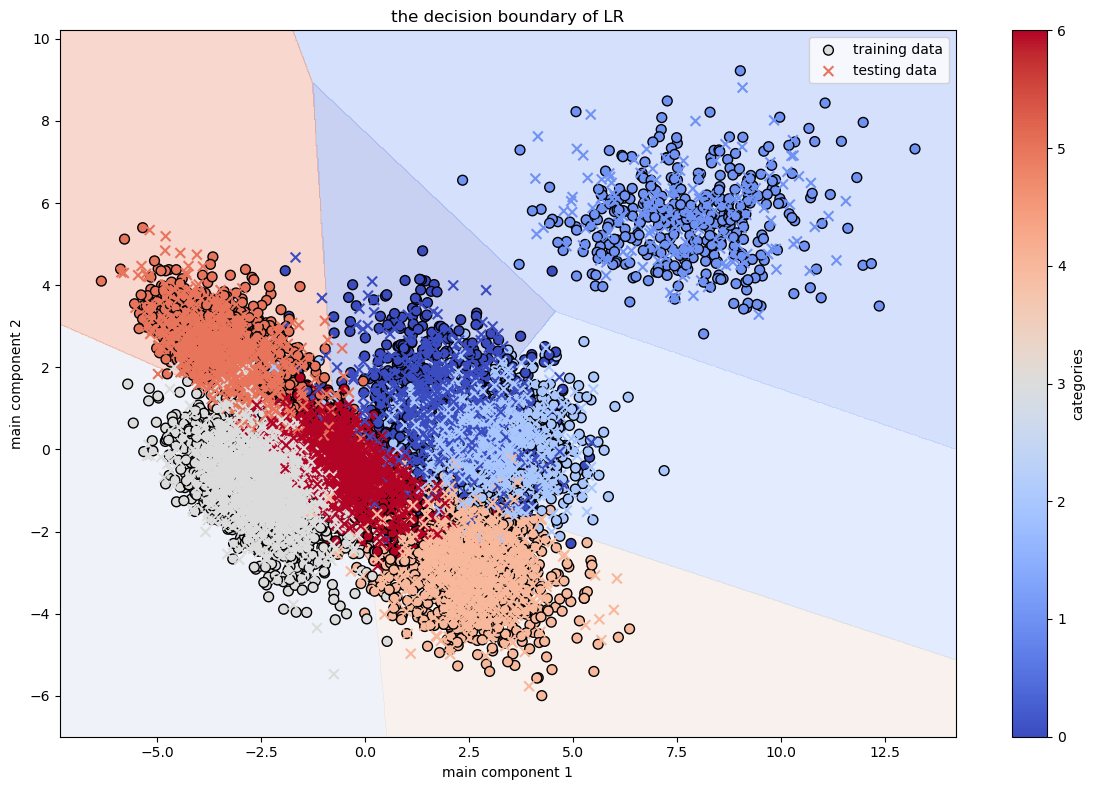

In [43]:
#  可视化决策边界（降维到二维） 可复用 X_train_2d, X_test_2d
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

#可复用 vis 函数
def vis(modeluse,string):
    # 创建网格
    h = 0.02  
    x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
    y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 预测类别
    Z = modeluse.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 决策边界
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # 训练数据点
    plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, 
                cmap=plt.cm.coolwarm, edgecolors='k', s=50, label='training data')
    plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, 
                cmap=plt.cm.coolwarm, marker='x', s=50, label='testing data')

    plt.colorbar(label='categories')
    plt.legend()
    plt.xlabel('main component 1')
    plt.ylabel('main component 2')
    plt.title('the decision boundary of' +' '+ string)
    plt.tight_layout()
    plt.show()
    return

# 新2d模型
LR_2d = LogisticRegression(max_iter=1000)
LR_2d.fit(X_train_2d, y_train)

vis(LR_2d,"LR")





training set Evaluation outcome:
Accuracy: 0.9302
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.91      0.94       927
      BOMBAY       1.00      1.00      1.00       361
        CALI       0.94      0.96      0.95      1151
    DERMASON       0.92      0.93      0.92      2503
       HOROZ       0.96      0.95      0.96      1340
       SEKER       0.96      0.95      0.95      1408
        SIRA       0.87      0.88      0.87      1837

    accuracy                           0.93      9527
   macro avg       0.94      0.94      0.94      9527
weighted avg       0.93      0.93      0.93      9527



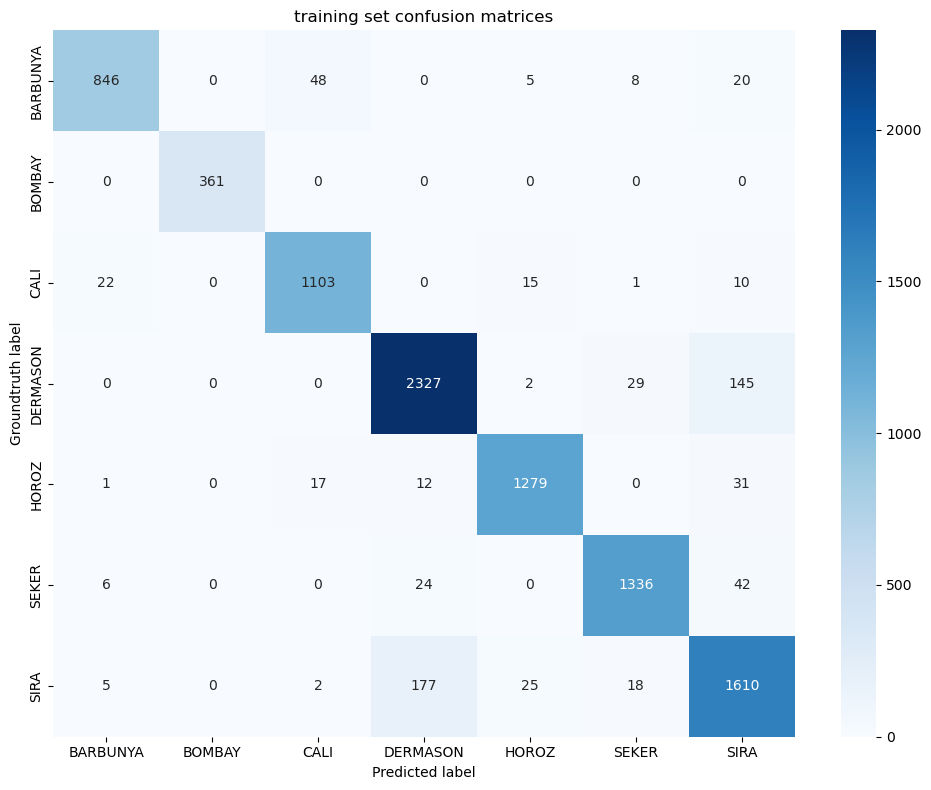


testing set Evaluation outcome:
Accuracy: 0.9334
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.92      0.93       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.93      0.95      0.94       479
    DERMASON       0.92      0.92      0.92      1043
       HOROZ       0.97      0.96      0.97       588
       SEKER       0.96      0.95      0.96       619
        SIRA       0.88      0.90      0.89       799

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



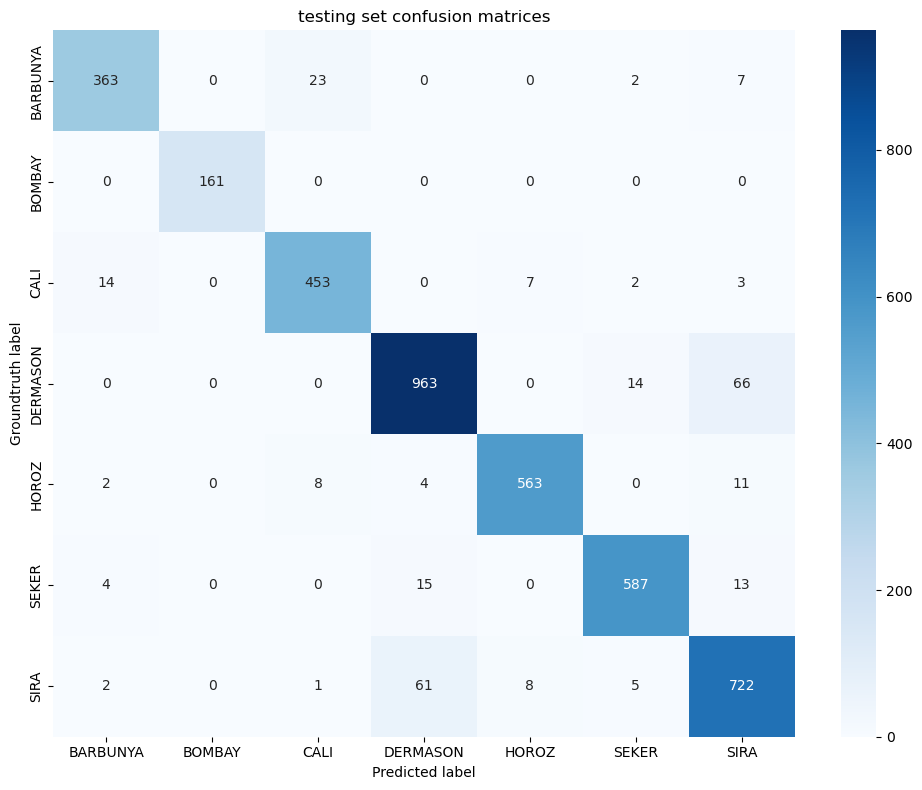


entire set Evaluation outcome:
Accuracy: 0.9312
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.91      0.93      1322
      BOMBAY       1.00      1.00      1.00       522
        CALI       0.94      0.95      0.95      1630
    DERMASON       0.92      0.93      0.92      3546
       HOROZ       0.97      0.96      0.96      1928
       SEKER       0.96      0.95      0.95      2027
        SIRA       0.87      0.88      0.88      2636

    accuracy                           0.93     13611
   macro avg       0.94      0.94      0.94     13611
weighted avg       0.93      0.93      0.93     13611



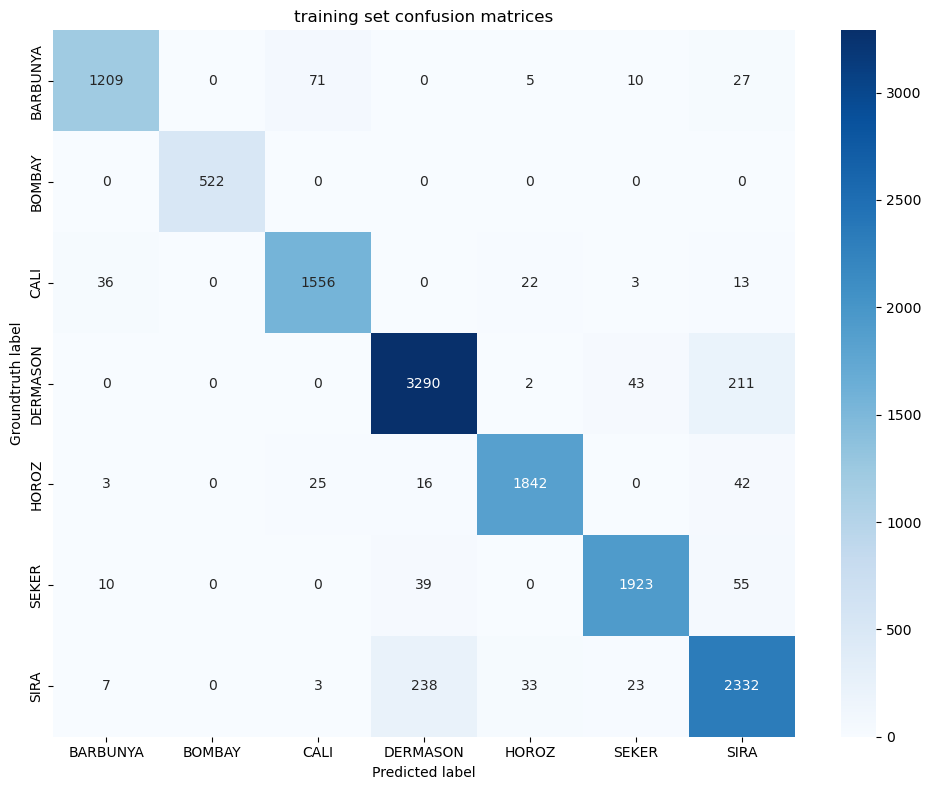

In [45]:
#svm
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

report(svm)

In [ ]:
#svm 的 grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # 正则化参数
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # 核函数
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]  # 核系数参数
}

svmg = SVC()

grid(svmg,param_grid)

the model optimizing is  SVC(random_state=42)
最优超参数组合:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
最优得分:  0.9306178857758205

training set (Best Model)Evaluation outcome:
Accuracy: 0.9416
              precision    recall  f1-score   support

    BARBUNYA       0.97      0.95      0.96       927
      BOMBAY       1.00      1.00      1.00       361
        CALI       0.96      0.97      0.96      1151
    DERMASON       0.92      0.94      0.93      2503
       HOROZ       0.98      0.96      0.97      1340
       SEKER       0.96      0.96      0.96      1408
        SIRA       0.89      0.88      0.89      1837

    accuracy                           0.94      9527
   macro avg       0.96      0.95      0.95      9527
weighted avg       0.94      0.94      0.94      9527


testing set (Best Model)Evaluation outcome:
Accuracy: 0.9322
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.93      0.93       395
      BOMBAY       1.00      1.00      1.00   

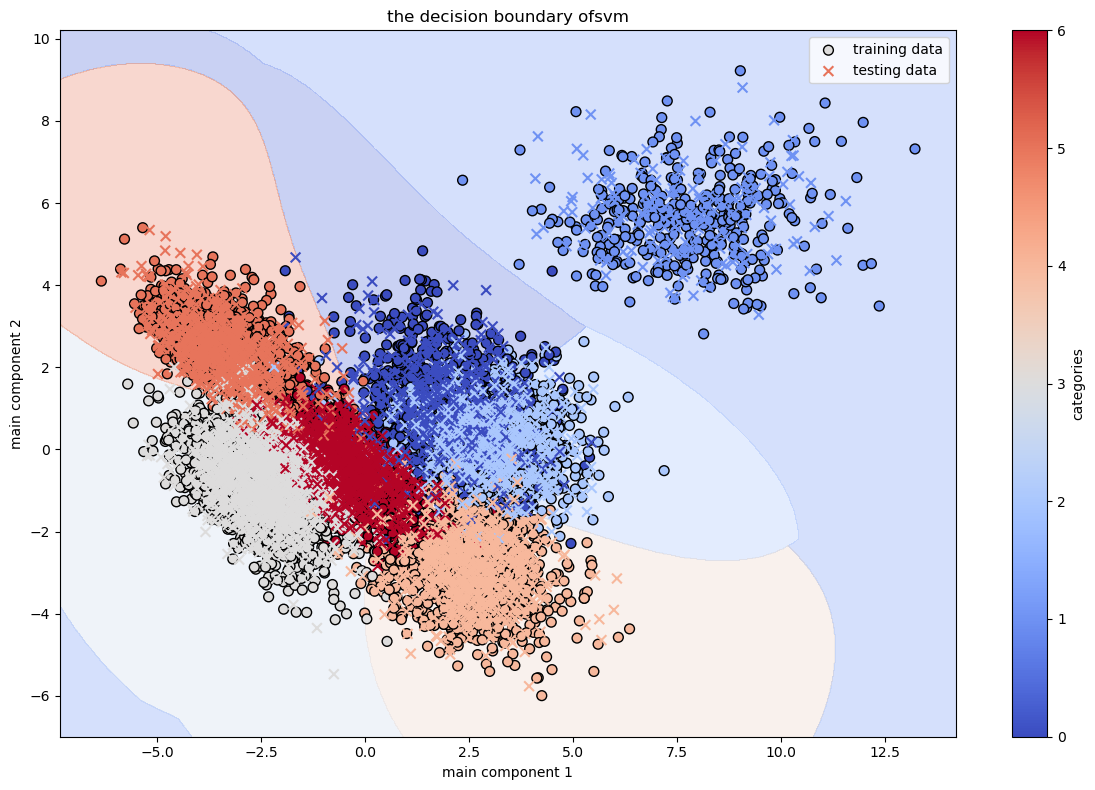

In [ ]:
#svm 的 vis
svm_2d = SVC()
svm_2d.fit(X_train_2d, y_train)

vis(svm_2d,"svm")


training set Evaluation outcome:
Accuracy: 0.9415
              precision    recall  f1-score   support

    BARBUNYA       0.97      0.93      0.95       927
      BOMBAY       1.00      1.00      1.00       361
        CALI       0.95      0.97      0.96      1151
    DERMASON       0.93      0.95      0.94      2503
       HOROZ       0.97      0.95      0.96      1340
       SEKER       0.96      0.95      0.96      1408
        SIRA       0.89      0.90      0.90      1837

    accuracy                           0.94      9527
   macro avg       0.95      0.95      0.95      9527
weighted avg       0.94      0.94      0.94      9527



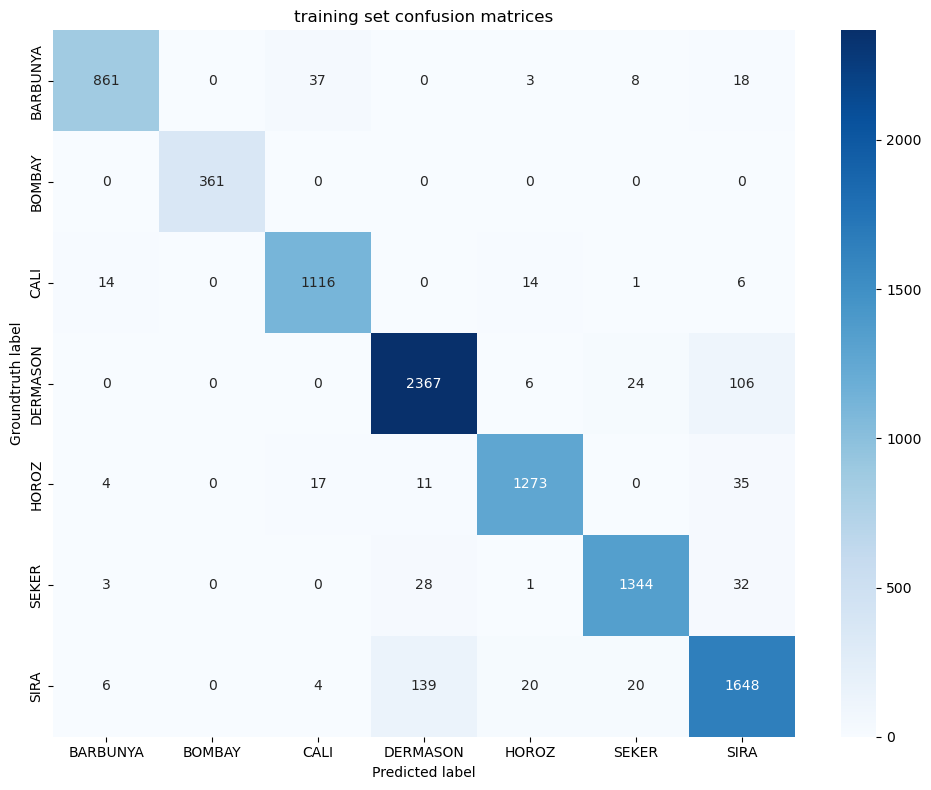


testing set Evaluation outcome:
Accuracy: 0.9214
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.92      0.94      0.93       479
    DERMASON       0.90      0.91      0.91      1043
       HOROZ       0.97      0.95      0.96       588
       SEKER       0.95      0.95      0.95       619
        SIRA       0.86      0.87      0.87       799

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



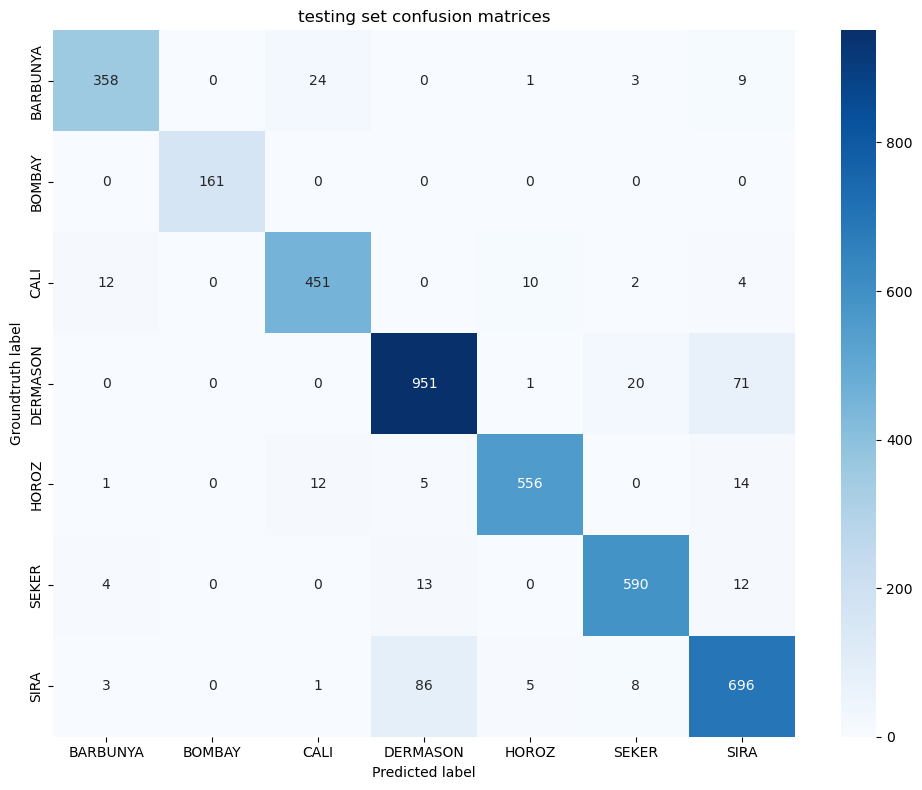


entire set Evaluation outcome:
Accuracy: 0.9355
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.92      0.94      1322
      BOMBAY       1.00      1.00      1.00       522
        CALI       0.94      0.96      0.95      1630
    DERMASON       0.92      0.94      0.93      3546
       HOROZ       0.97      0.95      0.96      1928
       SEKER       0.96      0.95      0.96      2027
        SIRA       0.88      0.89      0.89      2636

    accuracy                           0.94     13611
   macro avg       0.95      0.94      0.95     13611
weighted avg       0.94      0.94      0.94     13611



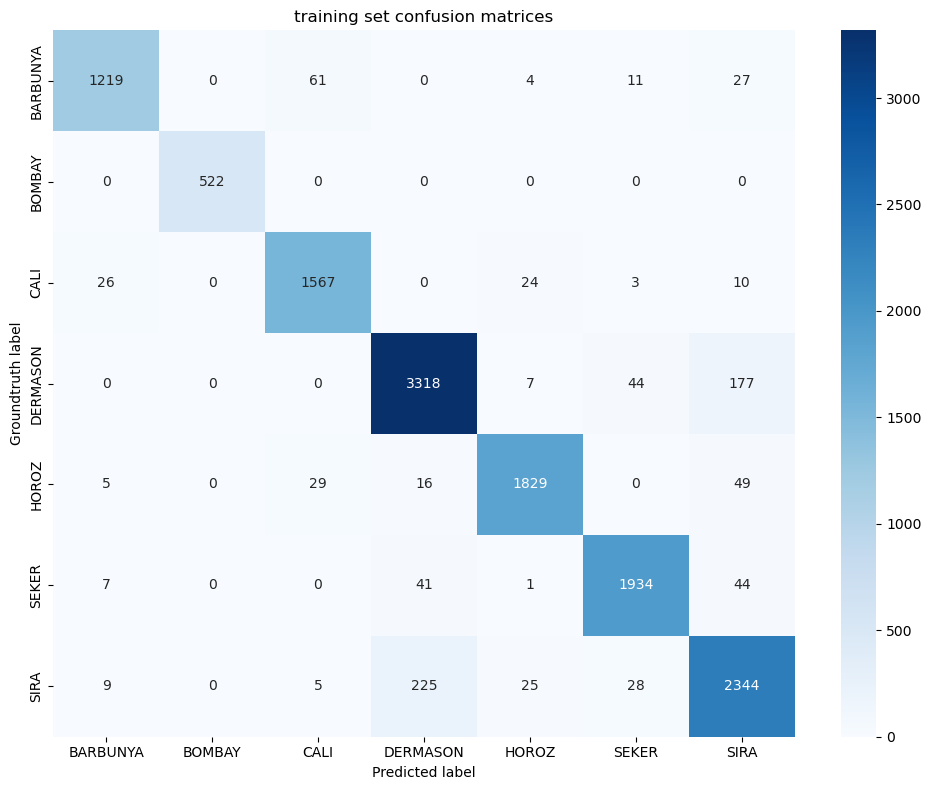

In [ ]:
#KNN实现
from sklearn.neighbors import KNeighborsClassifier
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "24"  # 设置为您计算机的核心数

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

report(KNN)

In [53]:
#KNN的grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # K值
    'weights': ['uniform', 'distance'],  # 权重计算方式
    'metric': ['euclidean', 'manhattan', 'minkowski']  # 距离度量
}

KNNG = KNeighborsClassifier()

grid(KNNG,param_grid)

the model optimizing is  KNeighborsClassifier()
最优超参数组合:  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
最优得分:  0.9240055302635962

training set (Best Model)Evaluation outcome:
Accuracy: 0.9360
              precision    recall  f1-score   support

    BARBUNYA       0.97      0.91      0.94       927
      BOMBAY       1.00      1.00      1.00       361
        CALI       0.94      0.97      0.95      1151
    DERMASON       0.92      0.94      0.93      2503
       HOROZ       0.97      0.95      0.96      1340
       SEKER       0.96      0.95      0.95      1408
        SIRA       0.88      0.89      0.88      1837

    accuracy                           0.94      9527
   macro avg       0.95      0.94      0.95      9527
weighted avg       0.94      0.94      0.94      9527


testing set (Best Model)Evaluation outcome:
Accuracy: 0.9243
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.90      0.92       395
      BOMBAY       1.

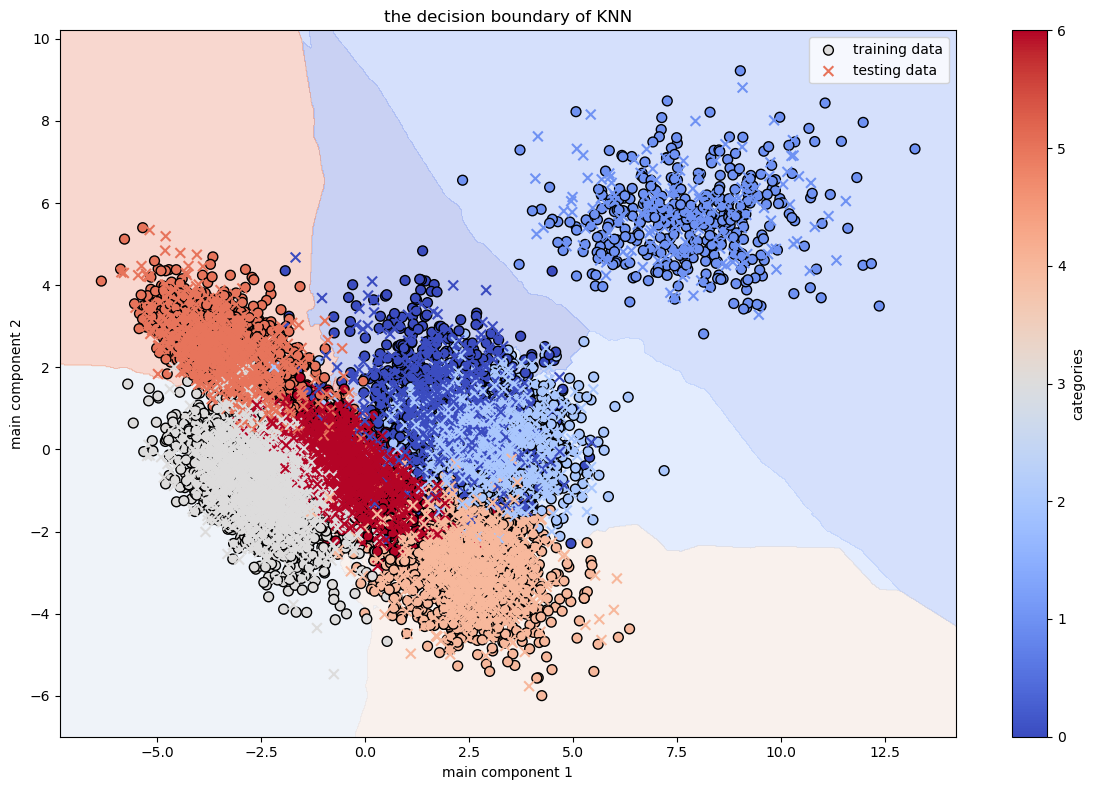

In [52]:
#KNN的vis
KNN_2d = KNeighborsClassifier()
KNN_2d.fit(X_train_2d, y_train)

vis(KNN_2d,"KNN")